<a href="https://colab.research.google.com/github/youlasozen/WTWY-EDA-Project/blob/main/WTWY_EDA_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

In [3]:
df1may = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220507.txt')
df2may = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220514.txt')
df3may = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220521.txt')
df4may = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220528.txt')

Merging csvs ↓

In [4]:
df = pd.concat([df1may, df2may, df3may, df4may], ignore_index = True)

In [5]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2022,00:00:00,REGULAR,7706010,2698804
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2022,04:00:00,REGULAR,7706014,2698808
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2022,08:00:00,REGULAR,7706017,2698835
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2022,12:00:00,REGULAR,7706038,2698924
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2022,16:00:00,REGULAR,7706084,2698963


In [6]:
df.isnull().sum()

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

In [7]:


df.columns



Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [8]:
df.rename(columns={'EXITS                                                               ':'EXITS'}, inplace=True)

In [9]:
df['TIME_INFO'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'])

In [10]:
df['WEEKDAYS'] = pd.to_datetime(df['DATE']).dt.day_name()
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TIME_INFO,WEEKDAYS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2022,00:00:00,REGULAR,7706010,2698804,2022-04-30 00:00:00,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2022,04:00:00,REGULAR,7706014,2698808,2022-04-30 04:00:00,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2022,08:00:00,REGULAR,7706017,2698835,2022-04-30 08:00:00,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2022,12:00:00,REGULAR,7706038,2698924,2022-04-30 12:00:00,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2022,16:00:00,REGULAR,7706084,2698963,2022-04-30 16:00:00,Saturday


In [11]:
df['TURNSTILE'] = df['C/A'] + df['UNIT'] + df['SCP']

In [12]:
df.sort_values(["STATION","TURNSTILE","TIME_INFO"], inplace=True, ascending=True)
df.drop_duplicates(subset=["STATION","TURNSTILE","TIME_INFO"], inplace=True)

In [13]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TIME_INFO,WEEKDAYS,TURNSTILE
33037,H007A,R248,02-00-00,1 AV,L,BMT,04/30/2022,00:00:00,REGULAR,5461,968,2022-04-30 00:00:00,Saturday,H007AR24802-00-00
33038,H007A,R248,02-00-00,1 AV,L,BMT,04/30/2022,04:00:00,REGULAR,5461,968,2022-04-30 04:00:00,Saturday,H007AR24802-00-00
33039,H007A,R248,02-00-00,1 AV,L,BMT,04/30/2022,08:00:00,REGULAR,5461,968,2022-04-30 08:00:00,Saturday,H007AR24802-00-00
33040,H007A,R248,02-00-00,1 AV,L,BMT,04/30/2022,12:00:00,REGULAR,5462,968,2022-04-30 12:00:00,Saturday,H007AR24802-00-00
33041,H007A,R248,02-00-00,1 AV,L,BMT,04/30/2022,16:00:00,REGULAR,5462,969,2022-04-30 16:00:00,Saturday,H007AR24802-00-00


In [14]:
df['NET_ENTRIES'] = df.ENTRIES.shift(-1) - df.ENTRIES
df['NET_EXITS'] = df.EXITS.shift(-1) - df.EXITS

In [15]:
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TIME_INFO,WEEKDAYS,TURNSTILE,NET_ENTRIES,NET_EXITS
33037,H007A,R248,02-00-00,1 AV,L,BMT,04/30/2022,00:00:00,REGULAR,5461,968,2022-04-30 00:00:00,Saturday,H007AR24802-00-00,0.0,0.0
33038,H007A,R248,02-00-00,1 AV,L,BMT,04/30/2022,04:00:00,REGULAR,5461,968,2022-04-30 04:00:00,Saturday,H007AR24802-00-00,0.0,0.0
33039,H007A,R248,02-00-00,1 AV,L,BMT,04/30/2022,08:00:00,REGULAR,5461,968,2022-04-30 08:00:00,Saturday,H007AR24802-00-00,1.0,0.0
33040,H007A,R248,02-00-00,1 AV,L,BMT,04/30/2022,12:00:00,REGULAR,5462,968,2022-04-30 12:00:00,Saturday,H007AR24802-00-00,0.0,1.0
33041,H007A,R248,02-00-00,1 AV,L,BMT,04/30/2022,16:00:00,REGULAR,5462,969,2022-04-30 16:00:00,Saturday,H007AR24802-00-00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818299,R419,R326,00-05-01,ZEREGA AV,6,IRT,05/27/2022,05:00:00,REGULAR,39,271,2022-05-27 05:00:00,Friday,R419R32600-05-01,0.0,0.0
818300,R419,R326,00-05-01,ZEREGA AV,6,IRT,05/27/2022,09:00:00,REGULAR,39,271,2022-05-27 09:00:00,Friday,R419R32600-05-01,0.0,0.0
818301,R419,R326,00-05-01,ZEREGA AV,6,IRT,05/27/2022,13:00:00,REGULAR,39,271,2022-05-27 13:00:00,Friday,R419R32600-05-01,0.0,0.0
818302,R419,R326,00-05-01,ZEREGA AV,6,IRT,05/27/2022,17:00:00,REGULAR,39,271,2022-05-27 17:00:00,Friday,R419R32600-05-01,0.0,0.0


In [16]:
df.sample(10, random_state = 42)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TIME_INFO,WEEKDAYS,TURNSTILE,NET_ENTRIES,NET_EXITS
5667,A035,R170,00-00-00,14 ST-UNION SQ,LNQR456W,BMT,05/02/2022,05:00:00,REGULAR,261524,654587,2022-05-02 05:00:00,Monday,A035R17000-00-00,9.0,39.0
584915,R238,R046,00-03-02,GRD CNTRL-42 ST,4567S,IRT,05/15/2022,08:00:00,REGULAR,4584462,3676822,2022-05-15 08:00:00,Sunday,R238R04600-03-02,127.0,303.0
52920,N051,R084,02-00-02,59 ST COLUMBUS,ABCD1,IND,05/06/2022,12:00:00,REGULAR,26568965,11104201,2022-05-06 12:00:00,Friday,N051R08402-00-02,467.0,321.0
417022,R634,R069,00-00-00,NEW LOTS AV,3,IRT,05/08/2022,12:00:00,REGULAR,6853868,9737488,2022-05-08 12:00:00,Sunday,R634R06900-00-00,79.0,167.0
610742,R512,R092,00-00-03,BROADWAY,NQW,BMT,05/19/2022,08:00:00,REGULAR,168266,249174,2022-05-19 08:00:00,Thursday,R512R09200-00-03,130.0,146.0
796138,R238,R046,00-03-02,GRD CNTRL-42 ST,4567S,IRT,05/23/2022,08:00:00,REGULAR,4590834,3700249,2022-05-23 08:00:00,Monday,R238R04600-03-02,161.0,880.0
581617,R229,R143,01-00-03,28 ST,6,IRT,05/18/2022,21:00:00,REGULAR,2559768,1053314,2022-05-18 21:00:00,Wednesday,R229R14301-00-03,63.0,17.0
58456,N075,R111,01-05-00,23 ST,CE,IND,04/30/2022,04:00:00,REGULAR,198896,0,2022-04-30 04:00:00,Saturday,N075R11101-05-00,0.0,0.0
17059,B021,R228,00-05-02,AVENUE J,BQ,BMT,05/03/2022,16:00:00,REGULAR,2199573,1086437,2022-05-03 16:00:00,Tuesday,B021R22800-05-02,106.0,98.0
194414,R529,R208,00-00-03,103 ST-CORONA,7,IRT,05/01/2022,04:00:00,REGULAR,2524819,1018721,2022-05-01 04:00:00,Sunday,R529R20800-00-03,94.0,27.0


In [17]:
df = df[(df.NET_ENTRIES  > 0) & (df.NET_ENTRIES  < 14400) & 
                (df.NET_EXITS  > 0) & (df.NET_EXITS  < 14400)]

In [18]:
df.sample(10, random_state = 42)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TIME_INFO,WEEKDAYS,TURNSTILE,NET_ENTRIES,NET_EXITS
304255,N342,R019,01-00-00,JAMAICA 179 ST,F,IND,05/11/2022,16:00:00,REGULAR,6517516,395459,2022-05-11 16:00:00,Wednesday,N342R01901-00-00,215.0,51.0
674266,J012,R379,00-00-00,KOSCIUSZKO ST,J,BMT,05/24/2022,09:00:00,REGULAR,5141846,3149091,2022-05-24 09:00:00,Tuesday,J012R37900-00-00,247.0,114.0
187621,R507,R134,00-03-00,HUNTERS PT AV,7,IRT,05/03/2022,13:00:00,REGULAR,1652744,5007793,2022-05-03 13:00:00,Tuesday,R507R13400-03-00,21.0,117.0
159509,R227A,R131,01-06-00,23 ST,6,IRT,05/05/2022,05:00:00,REGULAR,3101906,3460168,2022-05-05 05:00:00,Thursday,R227AR13101-06-00,6.0,38.0
733423,N505,R022,02-00-02,34 ST-HERALD SQ,BDFMNQRW,IND,05/22/2022,00:00:00,REGULAR,8193104,4453911,2022-05-22 00:00:00,Sunday,N505R02202-00-02,28.0,33.0
70976,N130,R383,01-06-01,80 ST,A,IND,05/02/2022,09:00:00,REGULAR,3747587,2971270,2022-05-02 09:00:00,Monday,N130R38301-06-01,69.0,28.0
493158,N135,R385,01-03-01,ROCKAWAY BLVD,A,IND,05/17/2022,01:00:00,REGULAR,419965,57385,2022-05-17 01:00:00,Tuesday,N135R38501-03-01,13.0,4.0
115720,N700,R570,00-00-01,72 ST-2 AVE,Q,IND,05/01/2022,13:00:00,REGULAR,774155,480656,2022-05-01 13:00:00,Sunday,N700R57000-00-01,112.0,202.0
562659,R143,R032,02-03-03,TIMES SQ-42 ST,1237ACENQRSW,IRT,05/19/2022,08:00:00,REGULAR,5763965,1544991,2022-05-19 08:00:00,Thursday,R143R03202-03-03,182.0,259.0
491582,N124,R103,00-03-01,BROADWAY JCT,ACJLZ,IND,05/20/2022,08:00:00,REGULAR,419488,233122,2022-05-20 08:00:00,Friday,N124R10300-03-01,300.0,111.0


In [19]:
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TIME_INFO,WEEKDAYS,TURNSTILE,NET_ENTRIES,NET_EXITS
33050,H007A,R248,02-00-00,1 AV,L,BMT,05/02/2022,04:00:00,REGULAR,5462,970,2022-05-02 04:00:00,Monday,H007AR24802-00-00,50.0,9.0
33051,H007A,R248,02-00-00,1 AV,L,BMT,05/02/2022,08:00:00,REGULAR,5512,979,2022-05-02 08:00:00,Monday,H007AR24802-00-00,162.0,27.0
33052,H007A,R248,02-00-00,1 AV,L,BMT,05/02/2022,12:00:00,REGULAR,5674,1006,2022-05-02 12:00:00,Monday,H007AR24802-00-00,132.0,29.0
33053,H007A,R248,02-00-00,1 AV,L,BMT,05/02/2022,16:00:00,REGULAR,5806,1035,2022-05-02 16:00:00,Monday,H007AR24802-00-00,201.0,32.0
33054,H007A,R248,02-00-00,1 AV,L,BMT,05/02/2022,20:00:00,REGULAR,6007,1067,2022-05-02 20:00:00,Monday,H007AR24802-00-00,53.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818214,R419,R326,00-03-01,ZEREGA AV,6,IRT,05/27/2022,01:00:00,REGULAR,1436574,294759,2022-05-27 01:00:00,Friday,R419R32600-03-01,17.0,5.0
818215,R419,R326,00-03-01,ZEREGA AV,6,IRT,05/27/2022,05:00:00,REGULAR,1436591,294764,2022-05-27 05:00:00,Friday,R419R32600-03-01,291.0,30.0
818216,R419,R326,00-03-01,ZEREGA AV,6,IRT,05/27/2022,09:00:00,REGULAR,1436882,294794,2022-05-27 09:00:00,Friday,R419R32600-03-01,111.0,36.0
818217,R419,R326,00-03-01,ZEREGA AV,6,IRT,05/27/2022,13:00:00,REGULAR,1436993,294830,2022-05-27 13:00:00,Friday,R419R32600-03-01,127.0,69.0


In [20]:
df.describe()

,ENTRIES,EXITS,NET_ENTRIES,NET_EXITS
count,6.707310e+05,6.707310e+05,670731.000000,670731.000000
mean,2.955855e+07,2.321494e+07,87.813090,114.468319
std,1.728451e+08,1.498691e+08,115.349582,158.635557
min,0.000000e+00,0.000000e+00,1.000000,1.000000
25%,3.900175e+05,2.832545e+05,14.000000,20.000000
50%,1.907693e+06,1.276330e+06,49.000000,59.000000
75%,6.494940e+06,4.520981e+06,120.000000,146.000000
max,2.116207e+09,2.039313e+09,13193.000000,12970.000000


In [21]:
df['WEEKDAYS_INDEX'] = pd.to_datetime(df['DATE']).dt.weekday
df.head()

<ipython-input-21-a22ce249befa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WEEKDAYS_INDEX'] = pd.to_datetime(df['DATE']).dt.weekday


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TIME_INFO,WEEKDAYS,TURNSTILE,NET_ENTRIES,NET_EXITS,WEEKDAYS_INDEX
33050,H007A,R248,02-00-00,1 AV,L,BMT,05/02/2022,04:00:00,REGULAR,5462,970,2022-05-02 04:00:00,Monday,H007AR24802-00-00,50.0,9.0,0
33051,H007A,R248,02-00-00,1 AV,L,BMT,05/02/2022,08:00:00,REGULAR,5512,979,2022-05-02 08:00:00,Monday,H007AR24802-00-00,162.0,27.0,0
33052,H007A,R248,02-00-00,1 AV,L,BMT,05/02/2022,12:00:00,REGULAR,5674,1006,2022-05-02 12:00:00,Monday,H007AR24802-00-00,132.0,29.0,0
33053,H007A,R248,02-00-00,1 AV,L,BMT,05/02/2022,16:00:00,REGULAR,5806,1035,2022-05-02 16:00:00,Monday,H007AR24802-00-00,201.0,32.0,0
33054,H007A,R248,02-00-00,1 AV,L,BMT,05/02/2022,20:00:00,REGULAR,6007,1067,2022-05-02 20:00:00,Monday,H007AR24802-00-00,53.0,15.0,0


In [22]:
df["Total"] = df["NET_ENTRIES"] + df["NET_EXITS"]

<ipython-input-22-cad958db526e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Total"] = df["NET_ENTRIES"] + df["NET_EXITS"]


In [23]:
busiest_stations = df.groupby("STATION").sum().sort_values("Total", ascending = False).reset_index().head(10)
busiest_stations.head(10)

,STATION,ENTRIES,EXITS,NET_ENTRIES,NET_EXITS,WEEKDAYS_INDEX,Total
0,34 ST-PENN STA,742846251270,666623917724,1390116.0,2198814.0,41786,3588930.0
1,GRD CNTRL-42 ST,39648748688,31479103758,1112320.0,1864991.0,35904,2977311.0
2,34 ST-HERALD SQ,227994058747,216405322361,1030102.0,1698708.0,25161,2728810.0
3,14 ST-UNION SQ,42373902264,31674853932,877812.0,1541892.0,19078,2419704.0
4,86 ST,135719014833,136784848077,930748.0,1432654.0,26187,2363402.0
5,TIMES SQ-42 ST,608971599153,277523898387,879603.0,1451135.0,25880,2330738.0
6,23 ST,630816993075,610158286448,965907.0,1345926.0,29064,2311833.0
7,42 ST-PORT AUTH,542094947124,407056334859,853239.0,1261641.0,18996,2114880.0
8,FULTON ST,665057383788,519594651131,796106.0,1244108.0,35580,2040214.0
9,125 ST,1172290897200,1085014962046,834474.0,1172391.0,18940,2006865.0


Text(0.5, 1.0, 'TOP 10 BUSIEST STATIONS')

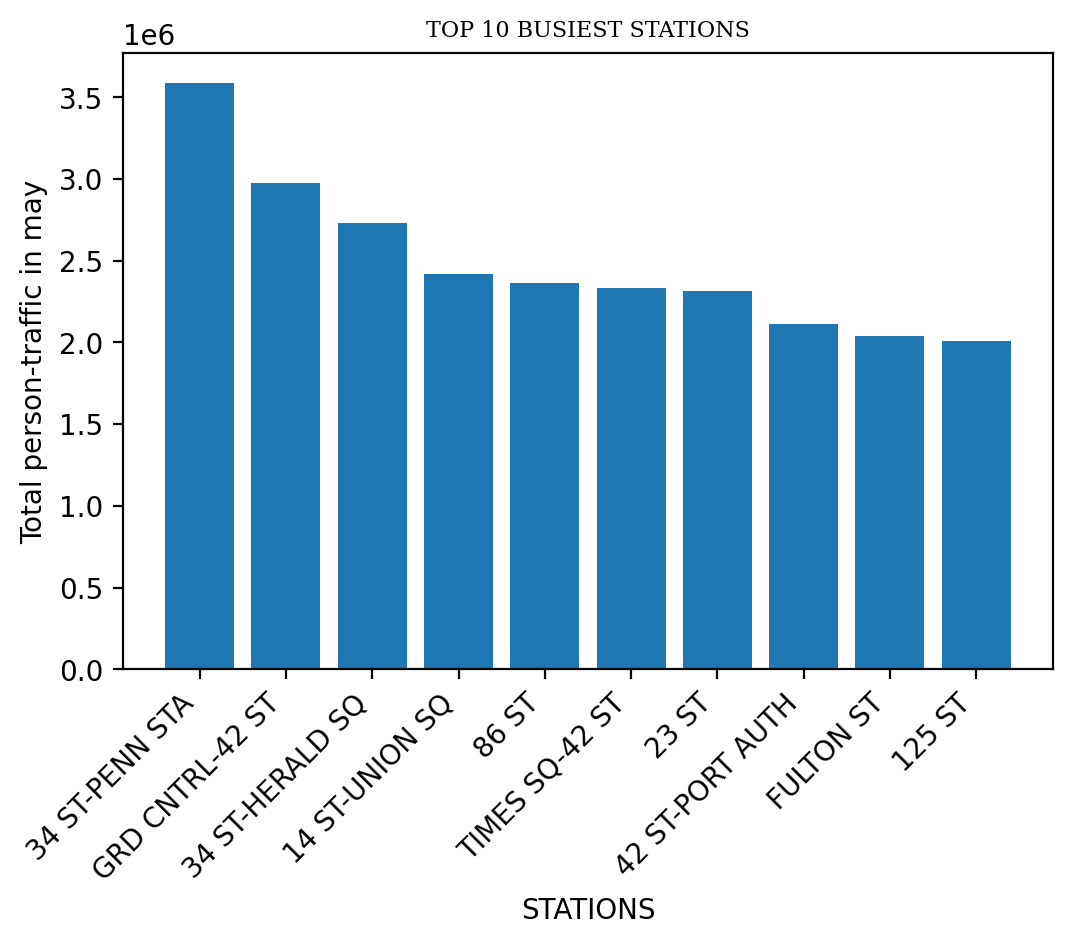

In [48]:
plt.figure(figsize=(6,4),dpi=200)
plt.bar(busiest_stations.STATION, busiest_stations.Total)
plt.xticks(rotation=45, ha='right');
plt.xlabel("STATIONS")
plt.ylabel("Total person-traffic in may")
plt.title("TOP 10 BUSIEST STATIONS", family='serif',fontsize = 8,loc='center')

In [25]:


busiest_days = df.groupby("WEEKDAYS").sum().sort_values("WEEKDAYS_INDEX", ascending = True).reset_index()
busiest_days



,WEEKDAYS,ENTRIES,EXITS,NET_ENTRIES,NET_EXITS,WEEKDAYS_INDEX,Total
0,Monday,2880177932322,2257270538114,8996570.0,11318288.0,0,20314858.0
1,Tuesday,2900379646979,2275488960231,10136301.0,12793102.0,98517,22929403.0
2,Wednesday,2887028839127,2263370510551,10183099.0,12882645.0,197216,23065744.0
3,Thursday,2908413634723,2281527877317,10112864.0,12824989.0,295527,22937853.0
4,Friday,2785594589949,2183159857498,9333213.0,11802683.0,377244,21135896.0
5,Saturday,2747408931306,2168536784368,5612057.0,8355401.0,459500,13967458.0
6,Sunday,2716831584016,2141623435599,4524858.0,6800342.0,546714,11325200.0


Text(0.5, 1.0, 'TOTAL TRAFFIC ACCORDING TO DAYS OF WEEK')

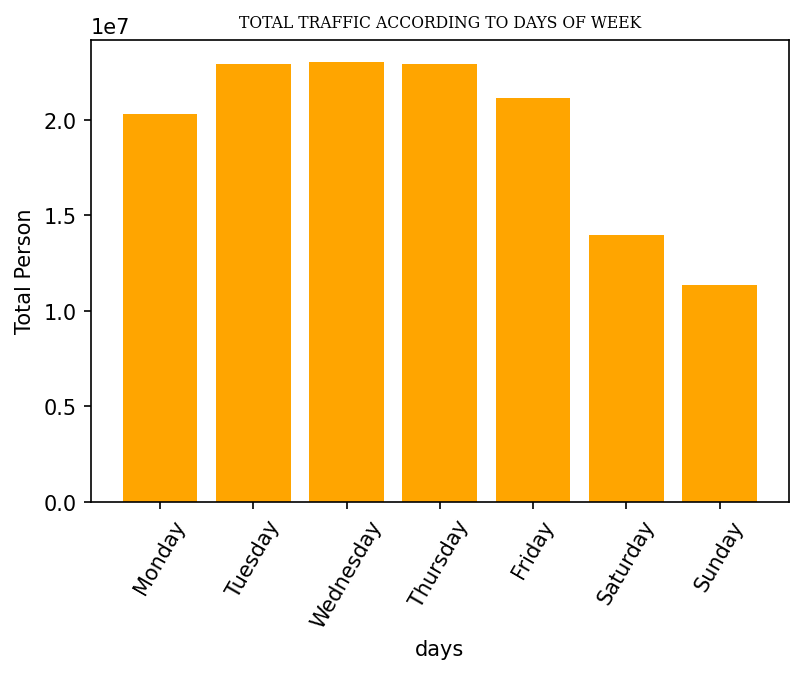

In [47]:


plt.figure(figsize=(6, 4),dpi=150)
plt.bar(busiest_days.WEEKDAYS, busiest_days.Total, color='orange');
plt.xlabel("days")
plt.xticks(rotation=60)
plt.ylabel("Total Person")
plt.title("TOTAL TRAFFIC ACCORDING TO DAYS OF WEEK", family='serif',fontsize = 7.5, loc='center')



In [27]:
time_groups = df.groupby("TIME")["Total"].sum()

In [28]:
most_people_time = time_groups.sort_values(ascending=False).index[0:5]
most_people_time

Index(['16:00:00', '08:00:00', '12:00:00', '13:00:00', '17:00:00'], dtype='object', name='TIME')

In [30]:
most_people_time2 = time_groups.sort_values(ascending=False).reset_index()
most_people_time2

,TIME,Total
0,16:00:00,22026756.0
1,08:00:00,17110679.0
2,12:00:00,17069102.0
3,13:00:00,12914934.0
4,17:00:00,11727439.0
...,...,...
22466,02:37:56,2.0
22467,00:09:01,2.0
22468,01:55:20,2.0
22469,19:26:59,2.0


In [31]:
df["TIME"] = df["TIME"].apply(lambda x: "12:00:00-16:00:00" if x == "16:00:00" else "04:00:00-08:00:00" if x == "08:00:00" else x)

<ipython-input-31-718235f3de1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TIME"] = df["TIME"].apply(lambda x: "12:00:00-16:00:00" if x == "16:00:00" else "04:00:00-08:00:00" if x == "08:00:00" else x)


In [32]:
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TIME_INFO,WEEKDAYS,TURNSTILE,NET_ENTRIES,NET_EXITS,WEEKDAYS_INDEX,Total
33050,H007A,R248,02-00-00,1 AV,L,BMT,05/02/2022,04:00:00,REGULAR,5462,970,2022-05-02 04:00:00,Monday,H007AR24802-00-00,50.0,9.0,0,59.0
33051,H007A,R248,02-00-00,1 AV,L,BMT,05/02/2022,04:00:00-08:00:00,REGULAR,5512,979,2022-05-02 08:00:00,Monday,H007AR24802-00-00,162.0,27.0,0,189.0
33052,H007A,R248,02-00-00,1 AV,L,BMT,05/02/2022,12:00:00,REGULAR,5674,1006,2022-05-02 12:00:00,Monday,H007AR24802-00-00,132.0,29.0,0,161.0
33053,H007A,R248,02-00-00,1 AV,L,BMT,05/02/2022,12:00:00-16:00:00,REGULAR,5806,1035,2022-05-02 16:00:00,Monday,H007AR24802-00-00,201.0,32.0,0,233.0
33054,H007A,R248,02-00-00,1 AV,L,BMT,05/02/2022,20:00:00,REGULAR,6007,1067,2022-05-02 20:00:00,Monday,H007AR24802-00-00,53.0,15.0,0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818214,R419,R326,00-03-01,ZEREGA AV,6,IRT,05/27/2022,01:00:00,REGULAR,1436574,294759,2022-05-27 01:00:00,Friday,R419R32600-03-01,17.0,5.0,4,22.0
818215,R419,R326,00-03-01,ZEREGA AV,6,IRT,05/27/2022,05:00:00,REGULAR,1436591,294764,2022-05-27 05:00:00,Friday,R419R32600-03-01,291.0,30.0,4,321.0
818216,R419,R326,00-03-01,ZEREGA AV,6,IRT,05/27/2022,09:00:00,REGULAR,1436882,294794,2022-05-27 09:00:00,Friday,R419R32600-03-01,111.0,36.0,4,147.0
818217,R419,R326,00-03-01,ZEREGA AV,6,IRT,05/27/2022,13:00:00,REGULAR,1436993,294830,2022-05-27 13:00:00,Friday,R419R32600-03-01,127.0,69.0,4,196.0


In [33]:
most_people_time3 = time_groups.sort_values(ascending=False).reset_index().iloc[0:5]
most_people_time3

,TIME,Total
0,16:00:00,22026756.0
1,08:00:00,17110679.0
2,12:00:00,17069102.0
3,13:00:00,12914934.0
4,17:00:00,11727439.0


Text(0.5, 1.0, 'TOTAL TRAFFIC ACCORDING TO TIMES OF DAY')

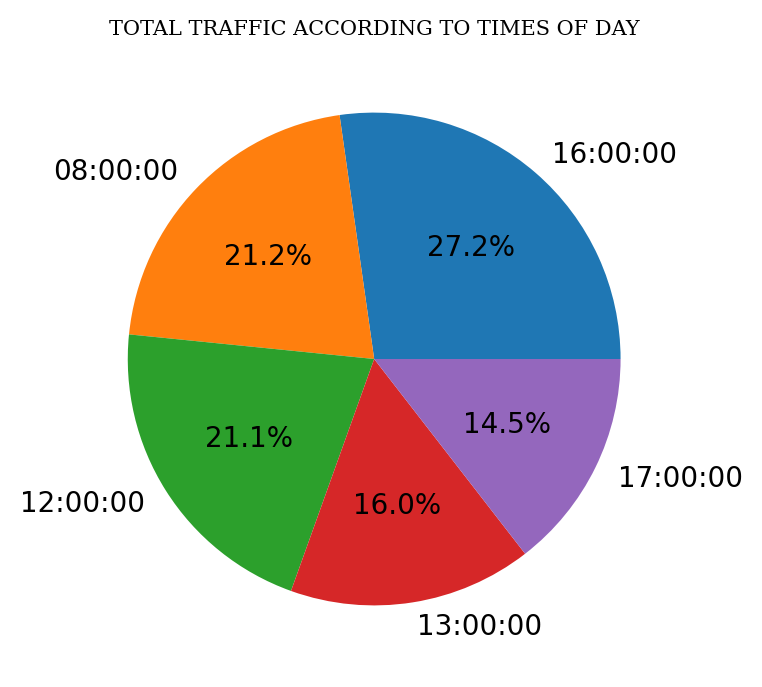

In [38]:
plt.figure(figsize=(6,4),dpi=200)
plt.pie(most_people_time3.Total, labels= most_people_time3.TIME, autopct='%.1f%%')
plt.title("TOTAL TRAFFIC ACCORDING TO TIMES OF DAY", family='serif',fontsize = 7.5,loc='center')